In [13]:
import numpy as np

In [42]:
import random


class kmeans():
  def __init__(self, n_clusters=2, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,X):
   random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
   self.centroids = X[random_index]
   #print(self.centroids)
   for i in range( X, self.max_iter):
    cluster_group = self.assign_cluster(X)
    old_centroids = self.centroids
    self.centroids = self.move_centroids(X,cluster_group)
    if (np.array_equal(old_centroids,self.centroids)):
      break
   print(self.centroids)
   return cluster_group

  def assign_cluster(self,X):
    cluster_group = []
    distances = []
    for row in X:
      for centroid in self.centroids:
        distance = np.sqrt(np.sum((row-centroid)**2))
        distances.append(distance)
      #print(distances)
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)


  def move_centroids(self,X,cluster_group):
    new_centroids = []
    cluster_type = np.unique(cluster_group)
    for type in cluster_type:
      new_centroid = X[cluster_group == type].mean(axis=0)
      new_centroids.append(new_centroid)
    return np.array(new_centroids)









In [43]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


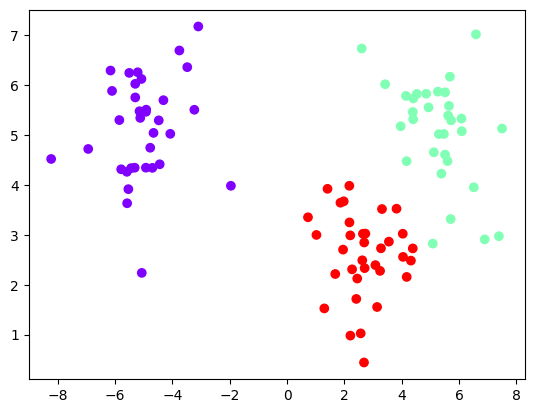

In [45]:
centroids = [(-5,5),(5,5),(2.5,2.5)]
cluster_std = [1,1,1]

X,y = make_blobs(n_samples=100 , cluster_std=cluster_std, centers=centroids, n_features=2)


km = KMeans(n_clusters=3,max_iter=100)
y_means = km.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_means,cmap='rainbow')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')
plt.show()